### Problem Statement
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In [178]:
# Importing the required libraries
import numpy as np
import pandas as pd


# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading dataset

In [179]:
# Reading telecom dataset.
data=pd.read_csv("telecom_churn_data.csv")

In [180]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

### Data Understanding

In [181]:
# checking shape of the dataset
data.shape

(99999, 226)

In [182]:
# Checking columns in the dataset
data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [183]:
# checking info about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [184]:
# describe the numerical variable in the data
data.describe()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   9.999900e+04    99999.0         98981.0         98981.0   
mean    7.001207e+09      109.0             0.0             0.0   
std     6.956694e+05        0.0             0.0             0.0   
min     7.000000e+09      109.0             0.0             0.0   
25%     7.000606e+09      109.0             0.0             0.0   
50%     7.001205e+09      109.0             0.0             0.0   
75%     7.001812e+09      109.0             0.0             0.0   
max     7.002411e+09      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8        arpu_9  \
count         98981.0  99999.000000  99999.000000  99999.000000  99999.000000   
mean              0.0    282.987358    278.536648    279.154731    261.645069   
std               0.0    328.439770    338.156291    344.474791    341.998630   
min               0.0  -2258.709000  -2014.045000   -945.808000  -1899.505000   
25%               0.0     93.411500     86.980500     84.126000     62.685000   
50%               0.0    197.704000    191.640000    192.080000    176.849000   
75%               0.0    371.060000    365.344500    369.370500    353.466500   
max               0.0  27731.088000  35145.834000  33543.624000  38805.617000   

        onnet_mou_6  ...   sachet_3g_9     fb_user_6     fb_user_7  \
count  96062.000000  ...  99999.000000  25153.000000  25571.000000   
mean     132.395875  ...      0.084581      0.914404      0.908764   
std      297.207406  ...      0.650457      0.279772      0.287950   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        7.380000  ...      0.000000      1.000000      1.000000   
50%       34.310000  ...      0.000000      1.000000      1.000000   
75%      118.740000  ...      0.000000      1.000000      1.000000   
max     7376.710000  ...     49.000000      1.000000      1.000000   

          fb_user_8     fb_user_9           aon    aug_vbc_3g    jul_vbc_3g  \
count  26339.000000  25922.000000  99999.000000  99999.000000  99999.000000   
mean       0.890808      0.860968   1219.854749     68.170248     66.839062   
std        0.311885      0.345987    954.733842    267.580450    271.201856   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    467.000000      0.000000      0.000000   
50%        1.000000      1.000000    863.000000      0.000000      0.000000   
75%        1.000000      1.000000   1807.500000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

         jun_vbc_3g    sep_vbc_3g  
count  99999.000000  99999.000000  
mean      60.021204      3.299373  
std      253.938223     32.408353  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max    11166.210000   2618.570000  

[8 rows x 214 columns]

In [185]:
# checking null values in the dataset.
data.isnull().sum(axis=0)

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

### Handling missing values

In [186]:
# checking percentage of missing values
Missing_percentage=round(100*(data.isnull().sum())/len(data), 2)

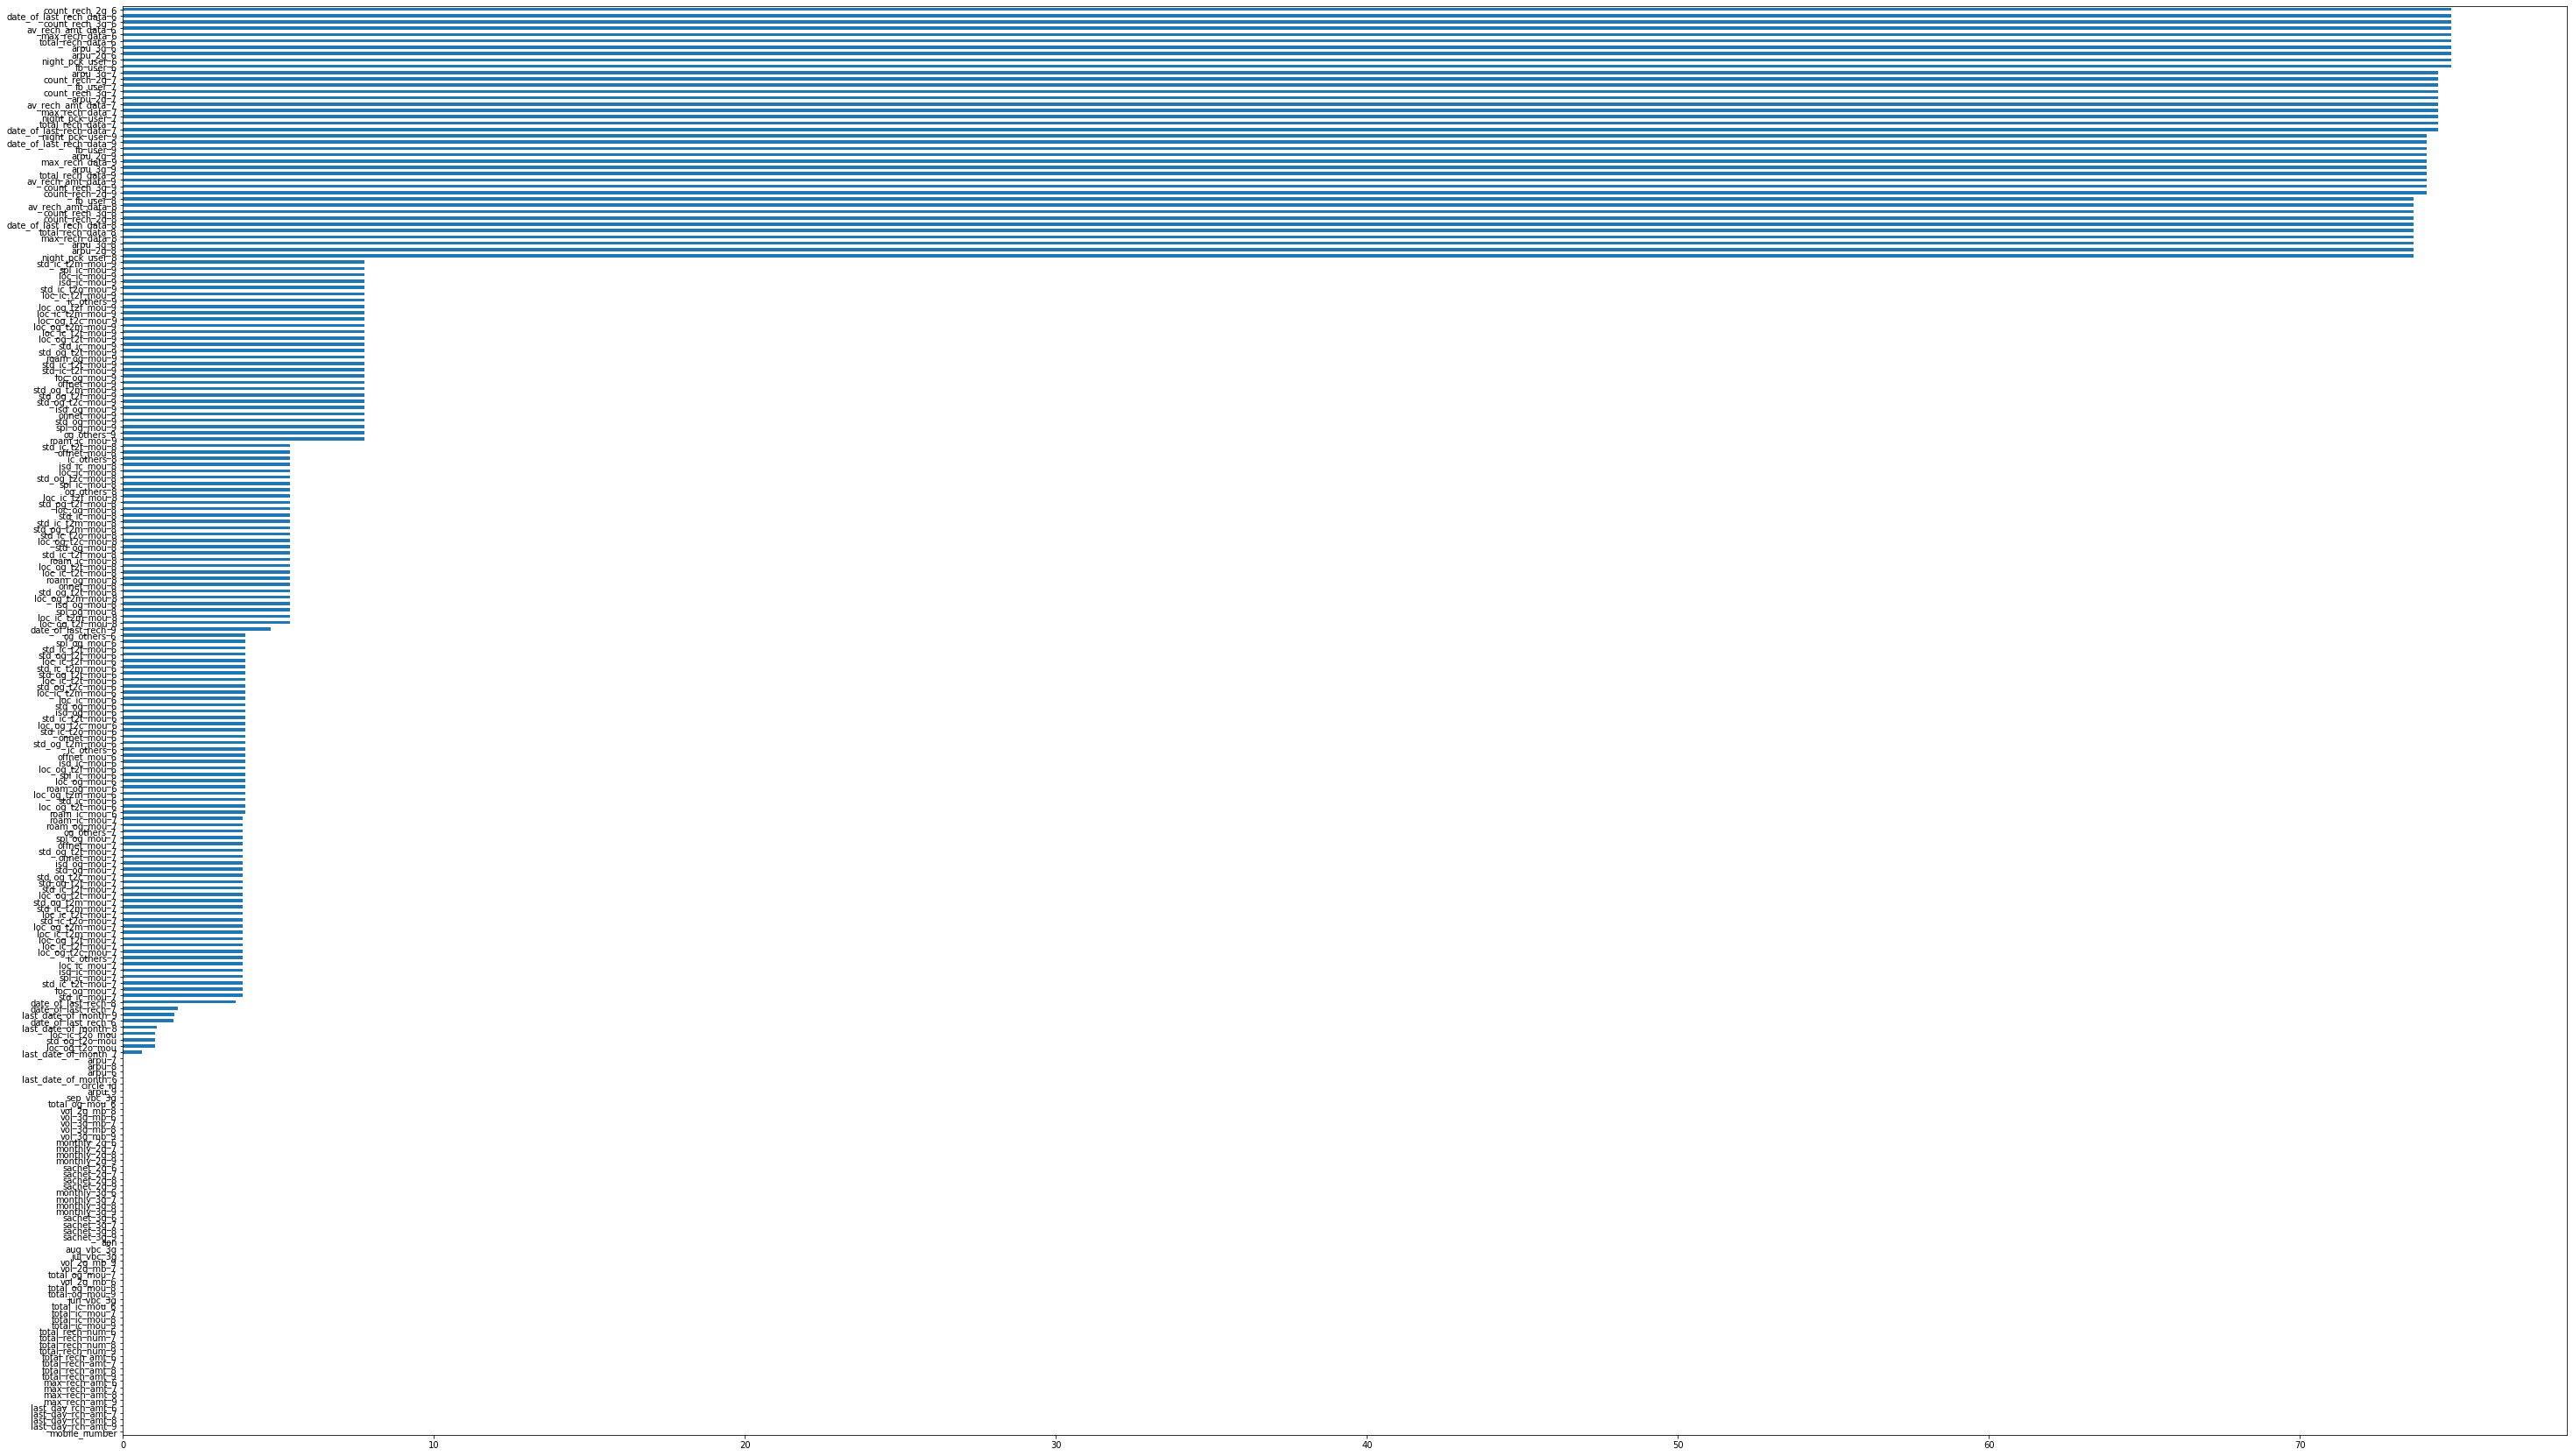

In [187]:
# visualizing the missing value percentage in the dataset.
Missing_percentage.sort_values().plot(kind='barh',figsize=(50,30))

In [188]:
# Checking percentage of missing values for the columns more than 50 percent
Missing_col=Missing_percentage[Missing_percentage>50]

In [189]:
# checking correlation of arpu. apru_6,7,8 and 9 are highly correlated with other arpu_3g,2g.so dropped arpu_2g and arpu_3g
data[["arpu_6","arpu_7","arpu_8","arpu_9","arpu_3g_6","arpu_3g_7","arpu_3g_8","arpu_3g_9","arpu_2g_6","arpu_2g_7","arpu_2g_8","arpu_2g_9"]].corr()

arpu_6    arpu_7    arpu_8    arpu_9  arpu_3g_6  arpu_3g_7  \
arpu_6     1.000000  0.732100  0.633975  0.589611   0.489462   0.360683   
arpu_7     0.732100  1.000000  0.769030  0.691140   0.342444   0.509490   
arpu_8     0.633975  0.769030  1.000000  0.800302   0.313144   0.362321   
arpu_9     0.589611  0.691140  0.800302  1.000000   0.293265   0.334966   
arpu_3g_6  0.489462  0.342444  0.313144  0.293265   1.000000   0.709523   
arpu_3g_7  0.360683  0.509490  0.362321  0.334966   0.709523   1.000000   
arpu_3g_8  0.314404  0.342267  0.486404  0.342255   0.671433   0.715128   
arpu_3g_9  0.335186  0.368296  0.449777  0.560473   0.606313   0.658875   
arpu_2g_6  0.455194  0.315097  0.288459  0.273603   0.932232   0.683467   
arpu_2g_7  0.332286  0.473234  0.335939  0.305358   0.687243   0.930366   
arpu_2g_8  0.289466  0.315916  0.442818  0.317033   0.656621   0.698018   
arpu_2g_9  0.304664  0.335349  0.350726  0.468127   0.598892   0.656876   

           arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  arpu_2g_8  arpu_2g_9  
arpu_6      0.314404   0.335186   0.455194   0.332286   0.289466   0.304664  
arpu_7      0.342267   0.368296   0.315097   0.473234   0.315916   0.335349  
arpu_8      0.486404   0.449777   0.288459   0.335939   0.442818   0.350726  
arpu_9      0.342255   0.560473   0.273603   0.305358   0.317033   0.468127  
arpu_3g_6   0.671433   0.606313   0.932232   0.687243   0.656621   0.598892  
arpu_3g_7   0.715128   0.658875   0.683467   0.930366   0.698018   0.656876  
arpu_3g_8   1.000000   0.712300   0.649529   0.693504   0.924925   0.702722  
arpu_3g_9   0.712300   1.000000   0.581808   0.629914   0.686909   0.852253  
arpu_2g_6   0.649529   0.581808   1.000000   0.700108   0.661591   0.609989  
arpu_2g_7   0.693504   0.629914   0.700108   1.000000   0.712150   0.654826  
arpu_2g_8   0.924925   0.686909   0.661591   0.712150   1.000000   0.715488  
arpu_2g_9   0.702722   0.852253   0.609989   0.654826   0.715488   1.000000

### Data preparation

In [190]:
# all missing value columns more than 50 percentage
Missing_col

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

In [191]:
# missing value more than 50 percentage column names
Missing_col=Missing_col.index
Missing_col

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [192]:
# dropped all the missing values more than 50 percentage
data=data.drop(labels=Missing_col,axis=1)
data.shape

(99999, 186)

In [193]:
# Checking shape after dropping missing values
data.shape

(99999, 186)

In [194]:
# Storing int variable in the intDF
intDF=data.select_dtypes('int64')
intDF.head()

mobile_number  circle_id  total_rech_num_6  total_rech_num_7  \
0     7000842753        109                 4                 3   
1     7001865778        109                 4                 9   
2     7001625959        109                 5                 4   
3     7001204172        109                10                11   
4     7000142493        109                 5                 6   

   total_rech_num_8  total_rech_num_9  total_rech_amt_6  total_rech_amt_7  \
0                 2                 6               362               252   
1                11                 5                74               384   
2                 2                 7               168               315   
3                18                14               230               310   
4                 3                 4               196               350   

   total_rech_amt_8  total_rech_amt_9  ...  sachet_2g_9  monthly_3g_6  \
0               252                 0  ...            0             1   
1               283               121  ...            0             0   
2               116               358  ...            1             0   
3               601               410  ...            0             0   
4               287               200  ...            0             0   

   monthly_3g_7  monthly_3g_8  monthly_3g_9  sachet_3g_6  sachet_3g_7  \
0             1             1             0            0            0   
1             0             0             0            0            0   
2             0             0             0            0            0   
3             0             0             0            0            0   
4             0             0             0            0            0   

   sachet_3g_8  sachet_3g_9   aon  
0            0            0   968  
1            0            0  1006  
2            0            0  1103  
3            0            0  2491  
4            0            0  1526  

[5 rows x 35 columns]

In [195]:
# int variable column names
intDF.columns

Index(['mobile_number', 'circle_id', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')

In [196]:
# shape of int variable dataframe
intDF.shape

(99999, 35)

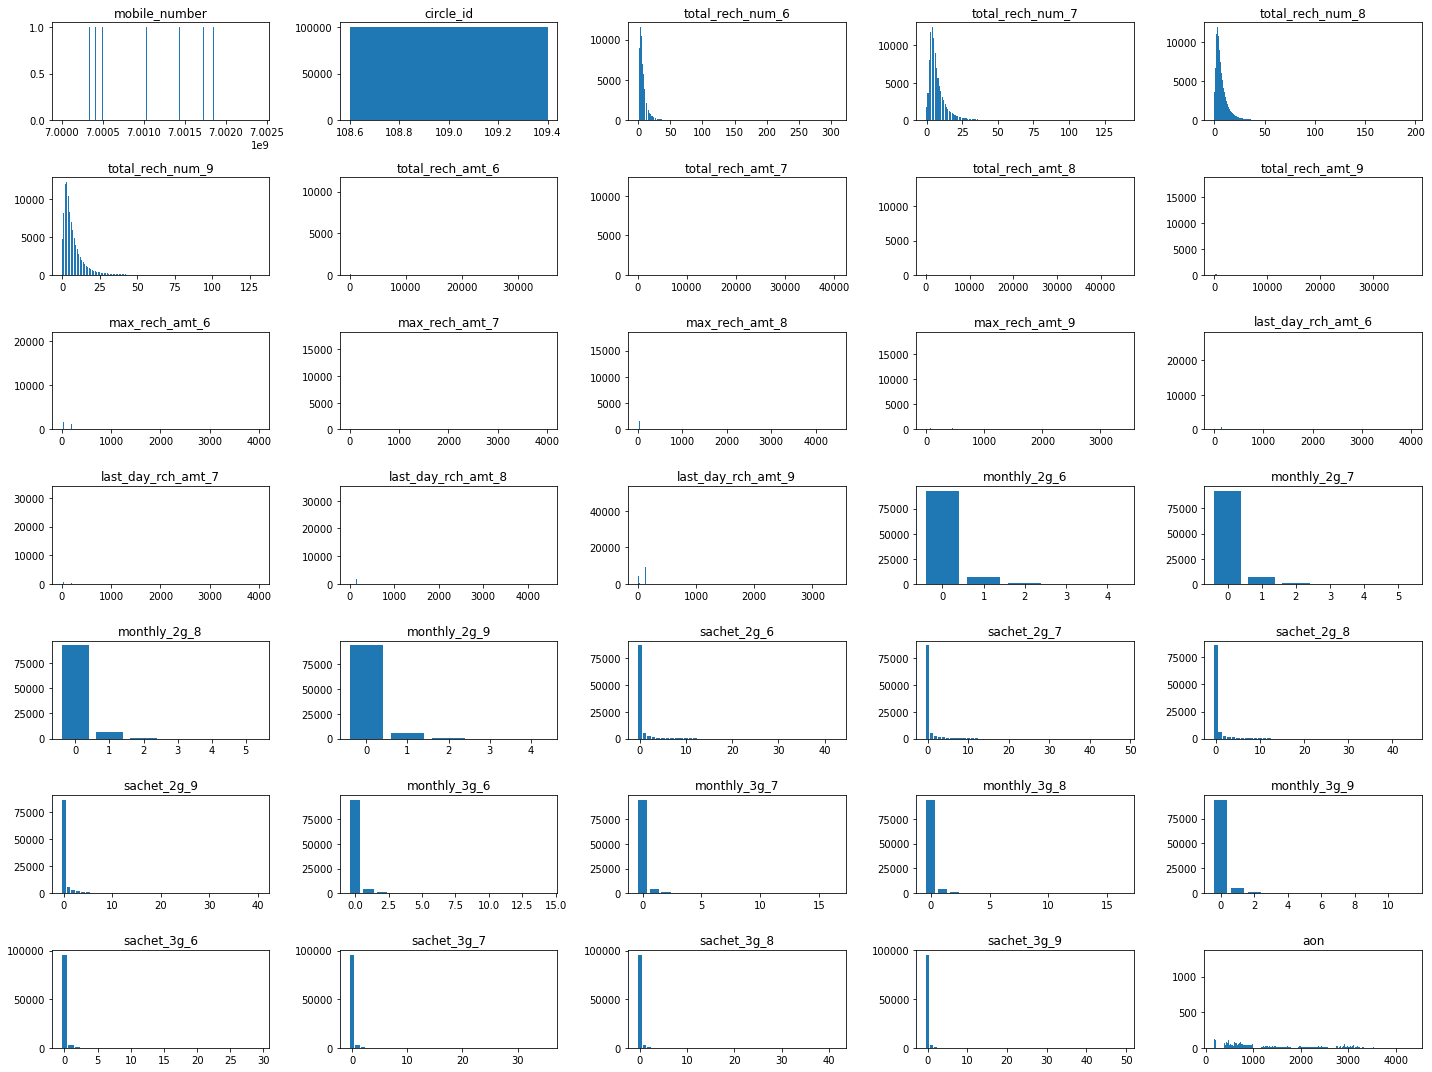

In [197]:
# visualizing int variable
fig,ax=plt.subplots(7,5,figsize=(20,15))
cnt=0
columns=intDF.columns.tolist()
for i in range(7):
    for j in range(5):
        try:
            tmp=intDF[columns[cnt]].value_counts()
            ax[i][j].bar(tmp.index,tmp.values)
            ax[i][j].set_title(columns[cnt])
            cnt+=1
        except IndexError:
            break
fig.tight_layout()

In [198]:
# circle id is skewed column
intDF["circle_id"].value_counts()

109    99999
Name: circle_id, dtype: int64

In [199]:
# dropping circle id
intDF=intDF.drop(columns=['circle_id',],axis=1)
intDF.shape

(99999, 34)

In [200]:
# int variable column names
intDF.columns

Index(['mobile_number', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'last_day_rch_amt_9', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'monthly_2g_9', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'sachet_2g_9', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8',
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon'],
      dtype='object')

In [201]:
# checking null values in the intDF
intDF.isnull().sum()


mobile_number         0
total_rech_num_6      0
total_rech_num_7      0
total_rech_num_8      0
total_rech_num_9      0
total_rech_amt_6      0
total_rech_amt_7      0
total_rech_amt_8      0
total_rech_amt_9      0
max_rech_amt_6        0
max_rech_amt_7        0
max_rech_amt_8        0
max_rech_amt_9        0
last_day_rch_amt_6    0
last_day_rch_amt_7    0
last_day_rch_amt_8    0
last_day_rch_amt_9    0
monthly_2g_6          0
monthly_2g_7          0
monthly_2g_8          0
monthly_2g_9          0
sachet_2g_6           0
sachet_2g_7           0
sachet_2g_8           0
sachet_2g_9           0
monthly_3g_6          0
monthly_3g_7          0
monthly_3g_8          0
monthly_3g_9          0
sachet_3g_6           0
sachet_3g_7           0
sachet_3g_8           0
sachet_3g_9           0
aon                   0
dtype: int64

In [202]:
# checking shape after intDF data cleaning 
intDF.shape

(99999, 34)

In [203]:
# Storing float value in the floatDF
floatDF=data.select_dtypes("float64")
floatDF.head()

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou   arpu_6   arpu_7   arpu_8  \
0             0.0             0.0             0.0  197.385  214.816  213.803   
1             0.0             0.0             0.0   34.047  355.074  268.321   
2             0.0             0.0             0.0  167.690  189.058  210.226   
3             0.0             0.0             0.0  221.338  251.102  508.054   
4             0.0             0.0             0.0  261.636  309.876  238.174   

    arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  ...  vol_2g_mb_8  \
0   21.100          NaN          NaN         0.00  ...         5.75   
1   86.285        24.11        78.68         7.68  ...       365.47   
2  290.714        11.54        55.24        37.26  ...         0.00   
3  389.500        99.91        54.39       310.98  ...         0.00   
4  163.426        50.31       149.44        83.89  ...         0.00   

   vol_2g_mb_9  vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  \
0          0.0        83.57       150.76       109.61         0.00   
1          0.0         0.00         0.00         0.00         0.00   
2          0.0         0.00         0.00         0.00         8.42   
3          0.0         0.00         0.00         0.00         0.00   
4          0.0         0.00         0.00         0.00         0.00   

   aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        30.4         0.0      101.20        3.58  
1         0.0         0.0        0.00        0.00  
2         0.0         0.0        4.17        0.00  
3         0.0         0.0        0.00        0.00  
4         0.0         0.0        0.00        0.00  

[5 rows x 143 columns]

In [204]:
# checking float data
floatDF.shape

(99999, 143)

In [205]:
# floatDf column names
float_column=floatDF.columns.tolist()

In [206]:
float_column

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [207]:
# all the variables are continous 
floatDF["roam_ic_mou_7"].value_counts()

0.00      81294
1.01         79
0.20         44
0.03         38
0.51         38
          ...  
711.11        1
127.78        1
75.26         1
45.83         1
588.86        1
Name: roam_ic_mou_7, Length: 5230, dtype: int64

In [208]:
floatDF.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_3g_mb_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=143)

In [209]:
# checking null values in the floatDF
floatDF.isnull().sum()

loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
arpu_6               0
arpu_7               0
                  ... 
vol_3g_mb_9          0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 143, dtype: int64

In [211]:
# checking column names
floatDF.columns.tolist()

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_

In [212]:
# Checking missing value columns
floatDF.isnull().sum()

loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
arpu_6               0
arpu_7               0
                  ... 
vol_3g_mb_9          0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 143, dtype: int64

In [213]:
# checking percentage of missing values
((round(100*(floatDF.isnull().sum())/len(floatDF), 2)))

loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
arpu_6            0.00
arpu_7            0.00
                  ... 
vol_3g_mb_9       0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 143, dtype: float64

In [214]:
# Dropping these columns from the floadt Df which are not useful for business
floatDF=floatDF.drop(columns=['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'],axis=1)
floatDF.shape

(99999, 140)

In [215]:
# checking shape
floatDF.shape

(99999, 140)

In [216]:
# imputing missing values with median
floatDF=floatDF.fillna(floatDF.median())
floatDF.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100        34.31        32.33         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  vol_2g_mb_8  vol_2g_mb_9  \
0        29.84         96.31        91.735  ...         5.75          0.0   
1        18.34         15.74        99.840  ...       365.47          0.0   
2        74.81        143.33       220.590  ...         0.00          0.0   
3       241.71        123.31       109.010  ...         0.00          0.0   
4        58.78         76.96        91.880  ...         0.00          0.0   

   vol_3g_mb_6  vol_3g_mb_7  vol_3g_mb_8  vol_3g_mb_9  aug_vbc_3g  jul_vbc_3g  \
0        83.57       150.76       109.61         0.00        30.4         0.0   
1         0.00         0.00         0.00         0.00         0.0         0.0   
2         0.00         0.00         0.00         8.42         0.0         0.0   
3         0.00         0.00         0.00         0.00         0.0         0.0   
4         0.00         0.00         0.00         0.00         0.0         0.0   

   jun_vbc_3g  sep_vbc_3g  
0      101.20        3.58  
1        0.00        0.00  
2        4.17        0.00  
3        0.00        0.00  
4        0.00        0.00  

[5 rows x 140 columns]

In [217]:
floatDF.isnull().sum()

arpu_6         0
arpu_7         0
arpu_8         0
arpu_9         0
onnet_mou_6    0
              ..
vol_3g_mb_9    0
aug_vbc_3g     0
jul_vbc_3g     0
jun_vbc_3g     0
sep_vbc_3g     0
Length: 140, dtype: int64

In [218]:
# object DF
objectDF=data.select_dtypes("object")
objectDF.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0            9/30/2014           6/21/2014           7/16/2014   
1            9/30/2014           6/29/2014           7/31/2014   
2            9/30/2014           6/17/2014           7/24/2014   
3            9/30/2014           6/28/2014           7/31/2014   
4            9/30/2014           6/26/2014           7/28/2014   

  date_of_last_rech_8 date_of_last_rech_9  
0            8/8/2014           9/28/2014  
1           8/28/2014           9/30/2014  
2           8/14/2014           9/29/2014  
3           8/31/2014           9/30/2014  
4            8/9/2014           9/28/2014

In [219]:
# shape of the objectDF
objectDF.shape

(99999, 8)

In [220]:
# objectDf columns
drop_date=objectDF.columns

In [221]:
# all the variable are data columns which are not useful 
drop_date

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9'],
      dtype='object')

In [222]:
# dropping all the date columns. objectDF contains only date columns so dropping all varibles
objectDF=objectDF.drop(labels=drop_date,axis=1)
objectDF.shape

(99999, 0)

In [223]:
# final data set, ObjectDf has no variable so combining floatDf and intDf
cleanedDF=pd.concat([intDF,floatDF],axis=1)
cleanedDF.shape

(99999, 174)

In [224]:
# checking again null values in the final cleanedDf
cleanedDF.isnull().sum()

mobile_number       0
total_rech_num_6    0
total_rech_num_7    0
total_rech_num_8    0
total_rech_num_9    0
                   ..
vol_3g_mb_9         0
aug_vbc_3g          0
jul_vbc_3g          0
jun_vbc_3g          0
sep_vbc_3g          0
Length: 174, dtype: int64

In [225]:
cleanedDF.columns

Index(['mobile_number', 'total_rech_num_6', 'total_rech_num_7',
       'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9',
       'max_rech_amt_6',
       ...
       'vol_2g_mb_8', 'vol_2g_mb_9', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'vol_3g_mb_9', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=174)

### Filtering  hight value customer(hcv)

In [226]:
# Deriving average_recharge_amt column by finding average of total_rech_6 and total_rech_7 column
cleanedDF["average_rech_amt"]=(cleanedDF["total_rech_amt_6"]+cleanedDF["total_rech_amt_7"])//2

In [227]:
# checking shape of the column
cleanedDF.shape

(99999, 175)

In [228]:
# finding 70th percentile of the average_rech_amt
cleanedDF["average_rech_amt"].quantile(0.7)

368.0

In [229]:
# describe average_rech_amt column
cleanedDF["average_rech_amt"].describe()

count    99999.000000
mean       325.108761
std        370.808099
min          0.000000
25%        115.000000
50%        229.000000
75%        419.000000
max      37762.000000
Name: average_rech_amt, dtype: float64

In [230]:
# dataset with average_rech_amt greater than and equal to 368
hcv= cleanedDF[cleanedDF["average_rech_amt"]>=368]

In [231]:
# checking shape after filtering high value customer
hcv.shape

(30078, 175)

##### Deriving churn colum with total incoming,outing,2g recharge and 3g recharge variables of 9th month

In [232]:
# derving churn data
hcv["churn"]=cleanedDF[["total_ic_mou_9","total_og_mou_9","vol_2g_mb_9","vol_3g_mb_9"]].apply(lambda x: 1 if (x["total_ic_mou_9"] and x["total_og_mou_9"] and x["vol_2g_mb_9"] and x["vol_3g_mb_9"])==0 else 0,axis=1)

In [233]:
# checking churn data value count
hcv["churn"].value_counts()


1    23789
0     6289
Name: churn, dtype: int64

In [234]:
# final hcv dataset
hcv.head()

mobile_number  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
7      7000701601                 5                 5                 7   
8      7001524846                19                21                14   
13     7002191713                 6                 4                11   
16     7000875565                10                 6                 2   
17     7000187447                19                 2                 4   

    total_rech_num_9  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
7                  3              1580               790              3638   
8                 15               437               601               120   
13                 7               507               253               717   
16                 1               570               348               160   
17                10               816                 0                30   

    total_rech_amt_9  max_rech_amt_6  ...  vol_3g_mb_6  vol_3g_mb_7  \
7                  0            1580  ...          0.0         0.00   
8                186              90  ...          0.0       750.95   
13               353             110  ...          0.0         0.00   
16               220             110  ...          0.0         0.00   
17               335             110  ...          0.0         0.00   

    vol_3g_mb_8  vol_3g_mb_9  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
7          0.00          0.0       57.74       19.38       18.74         0.0   
8         11.94          0.0       21.03      910.65      122.16         0.0   
13         0.00          0.0        0.00        0.00        0.00         0.0   
16         0.00          0.0        0.00        2.45       21.89         0.0   
17         0.00          0.0        0.00        0.00        0.00         0.0   

    average_rech_amt  churn  
7               1185      1  
8                519      1  
13               380      1  
16               459      1  
17               408      1  

[5 rows x 176 columns]

In [235]:
# checking shape
hcv.shape

(30078, 176)

In [236]:
# filtering only 9th month data columns
df2 = hcv.filter(regex='_9')
print(df2.columns)

Index(['total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'vol_2g_mb_9', 'vol_3g_mb_9'],
      dtype='object')


In [237]:
# storing 9th month column names in df2_col
df2_col=df2.columns.tolist()

In [238]:
df2_col

['total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'last_day_rch_amt_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9']

In [239]:
# dropping all 9th month column
hcv=hcv.drop(labels=df2_col,axis=1)
hcv.shape

(30078, 134)

In [240]:
hcv.columns.tolist()

['mobile_number',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7'

### Performing EDA

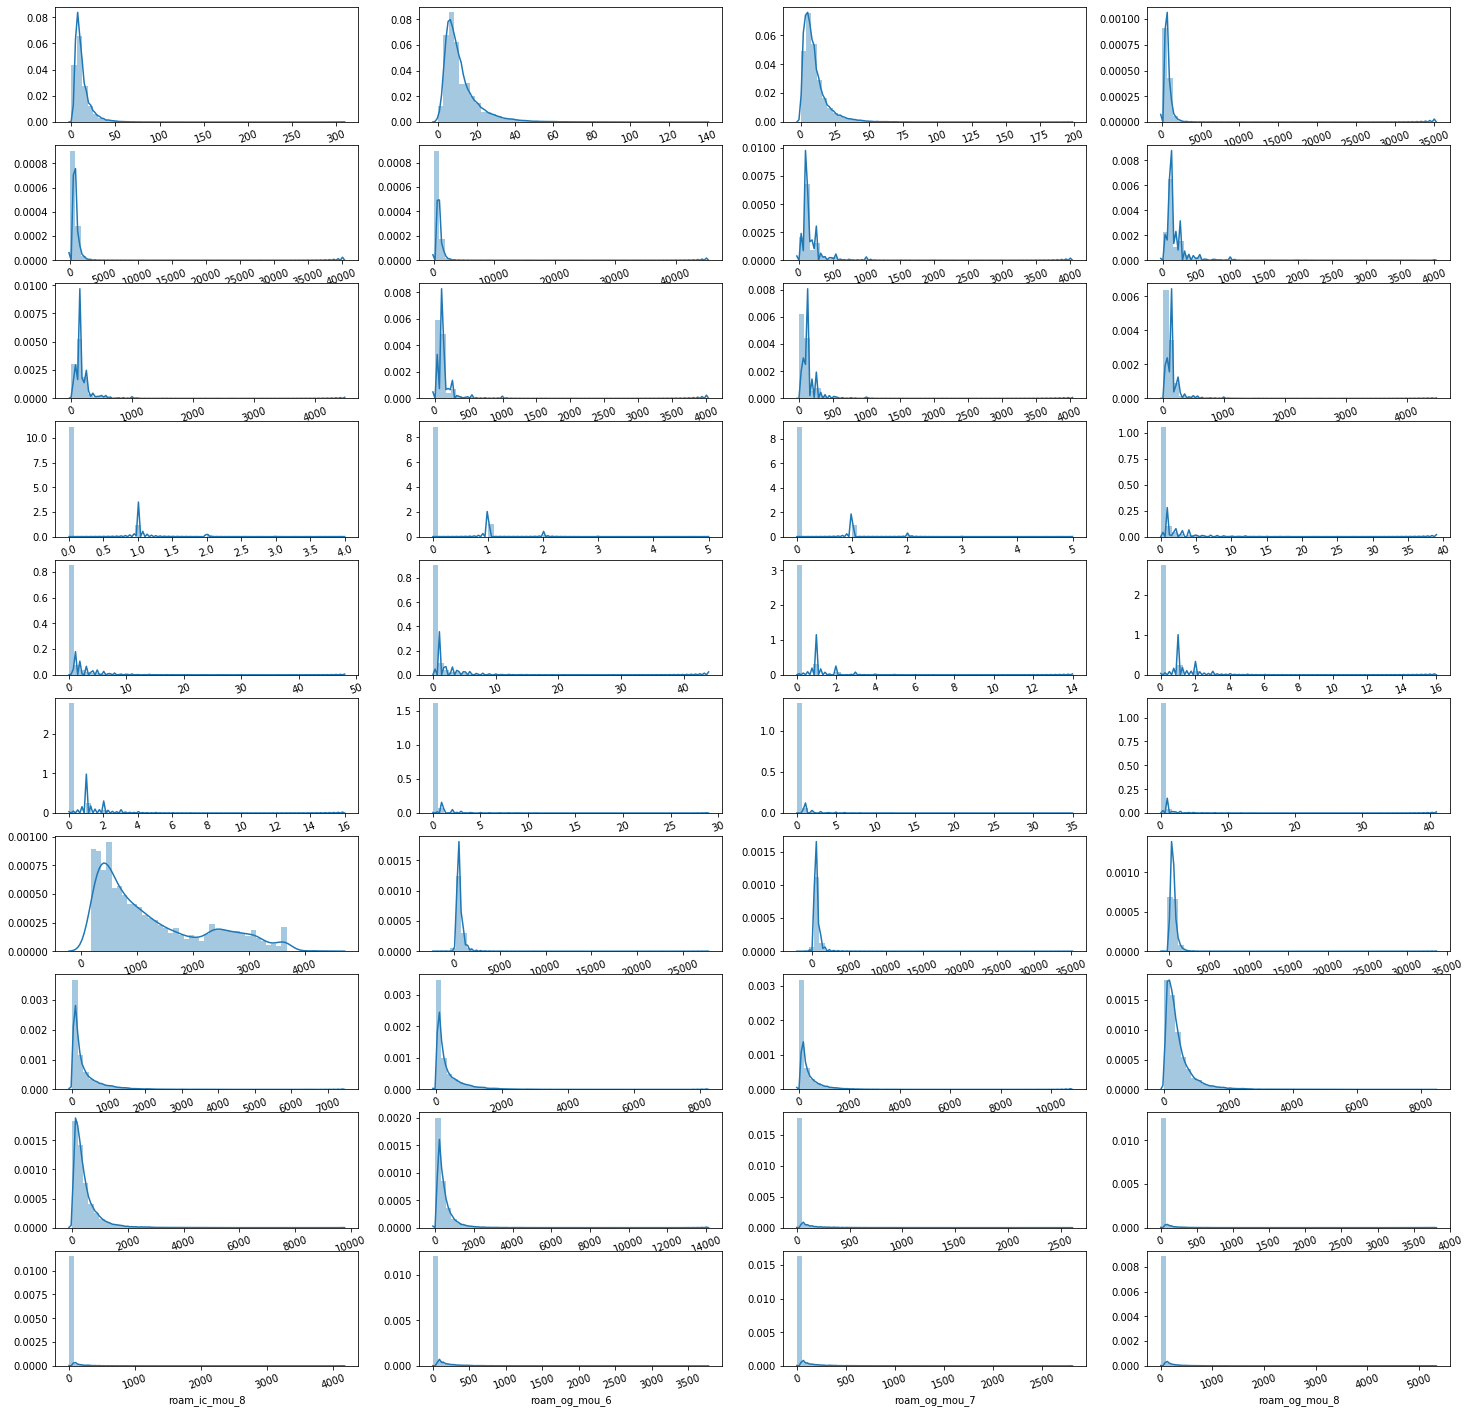

In [241]:
#univariate Analysis
plt.figure(figsize=(25,25))
features = ['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8']
for i in enumerate(features): 
    ax = plt.subplot(10, 4, i[0]+1)
    sns.distplot(hcv[i[1]])
    plt.xticks(rotation = 20)

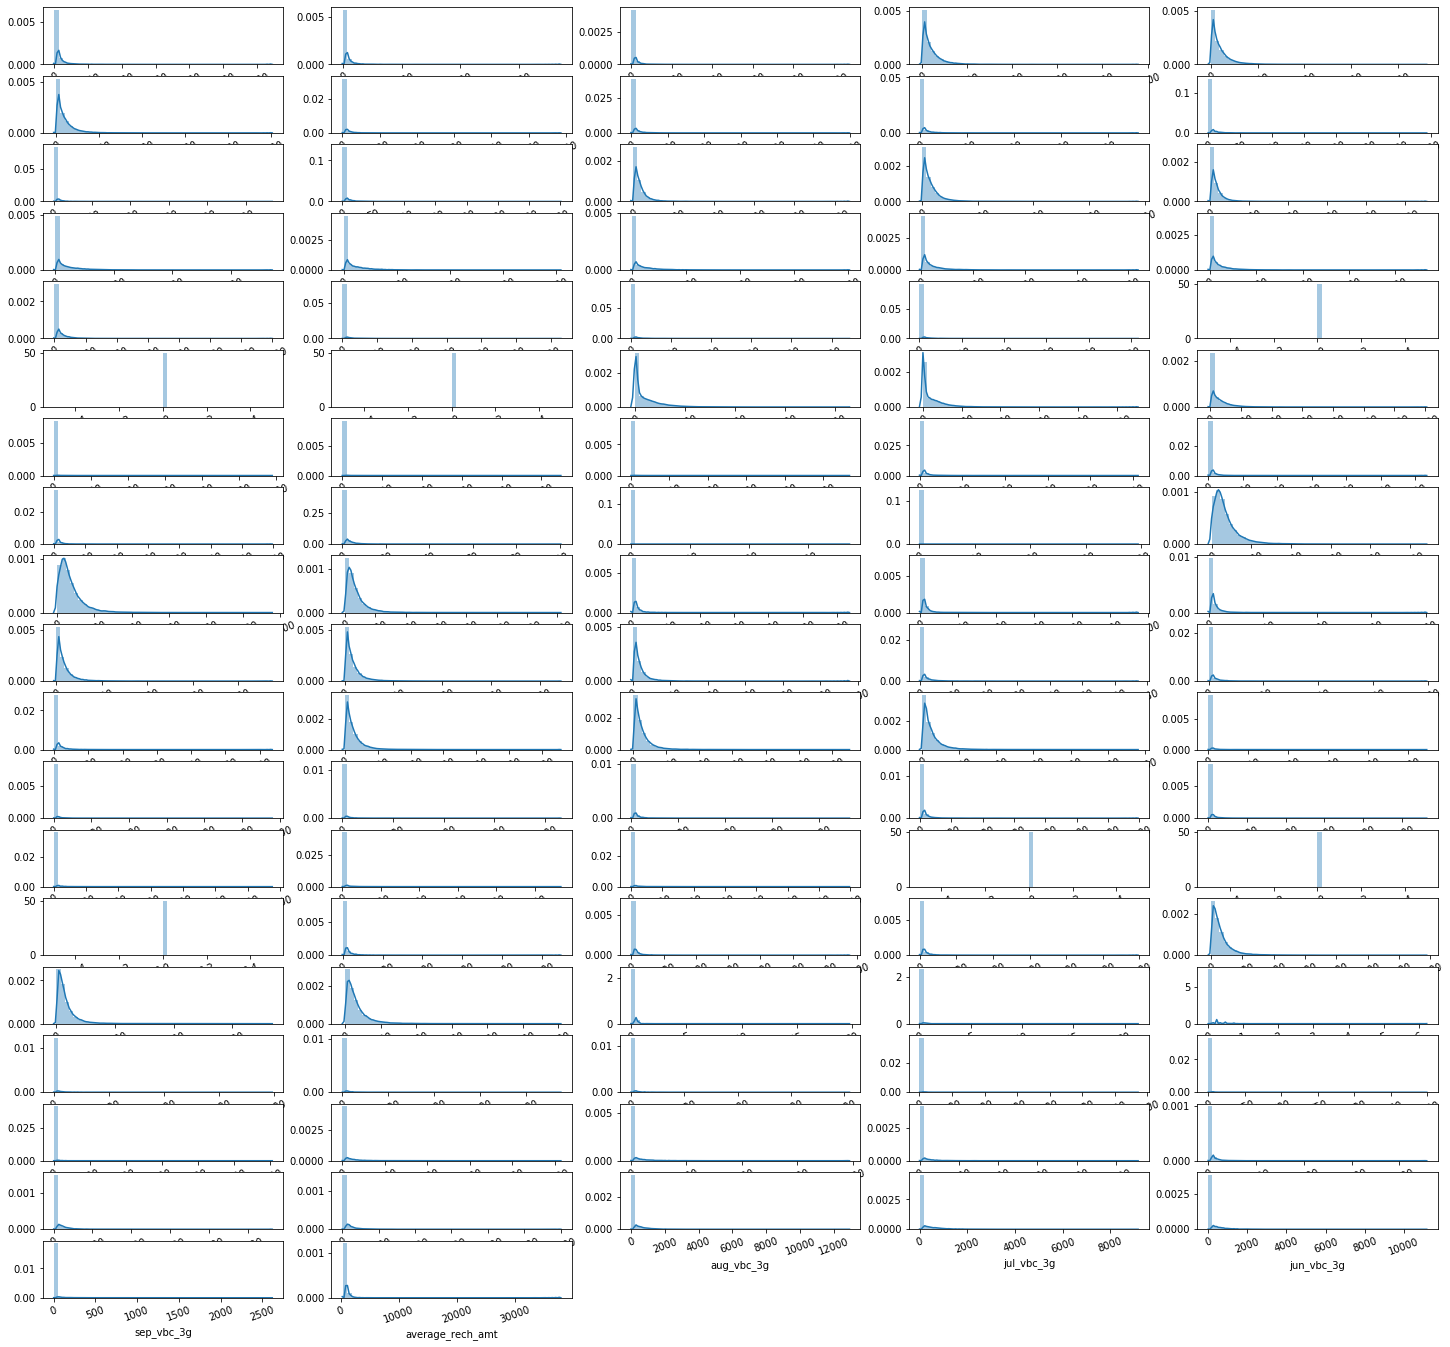

In [242]:
plt.figure(figsize=(25,25))
features = ['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g',
 'average_rech_amt']
for i in enumerate(features): 
    ax = plt.subplot(20, 5, i[0]+1)
    sns.distplot(hcv[i[1]])
    plt.xticks(rotation = 20)

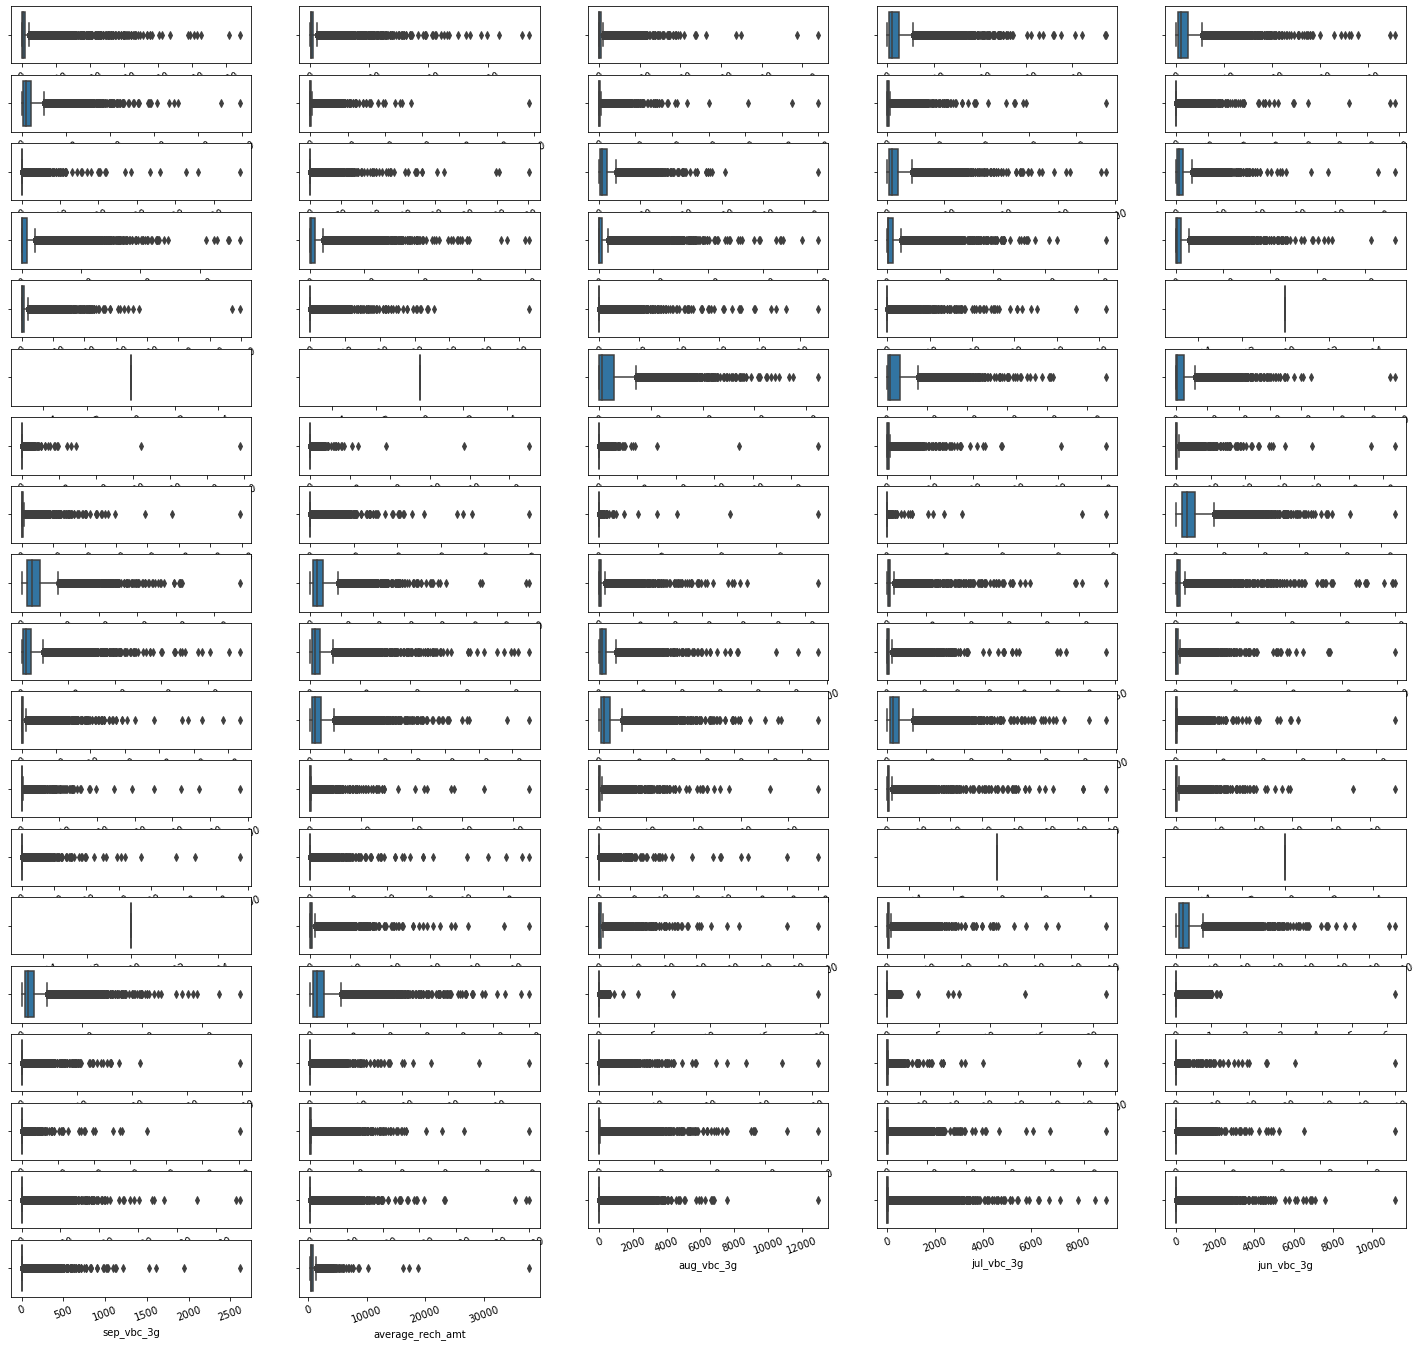

In [243]:
plt.figure(figsize=(25,25))
features = ['loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_ic_t2m_mou_7',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'std_ic_t2f_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'spl_ic_mou_6',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'vol_2g_mb_6',
 'vol_2g_mb_7',
 'vol_2g_mb_8',
 'vol_3g_mb_6',
 'vol_3g_mb_7',
 'vol_3g_mb_8',
 'aug_vbc_3g',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'sep_vbc_3g',
 'average_rech_amt']
for i in enumerate(features): 
    ax = plt.subplot(20, 5, i[0]+1)
    sns.boxplot(x=i[1], data=hcv)
    plt.xticks(rotation = 20)

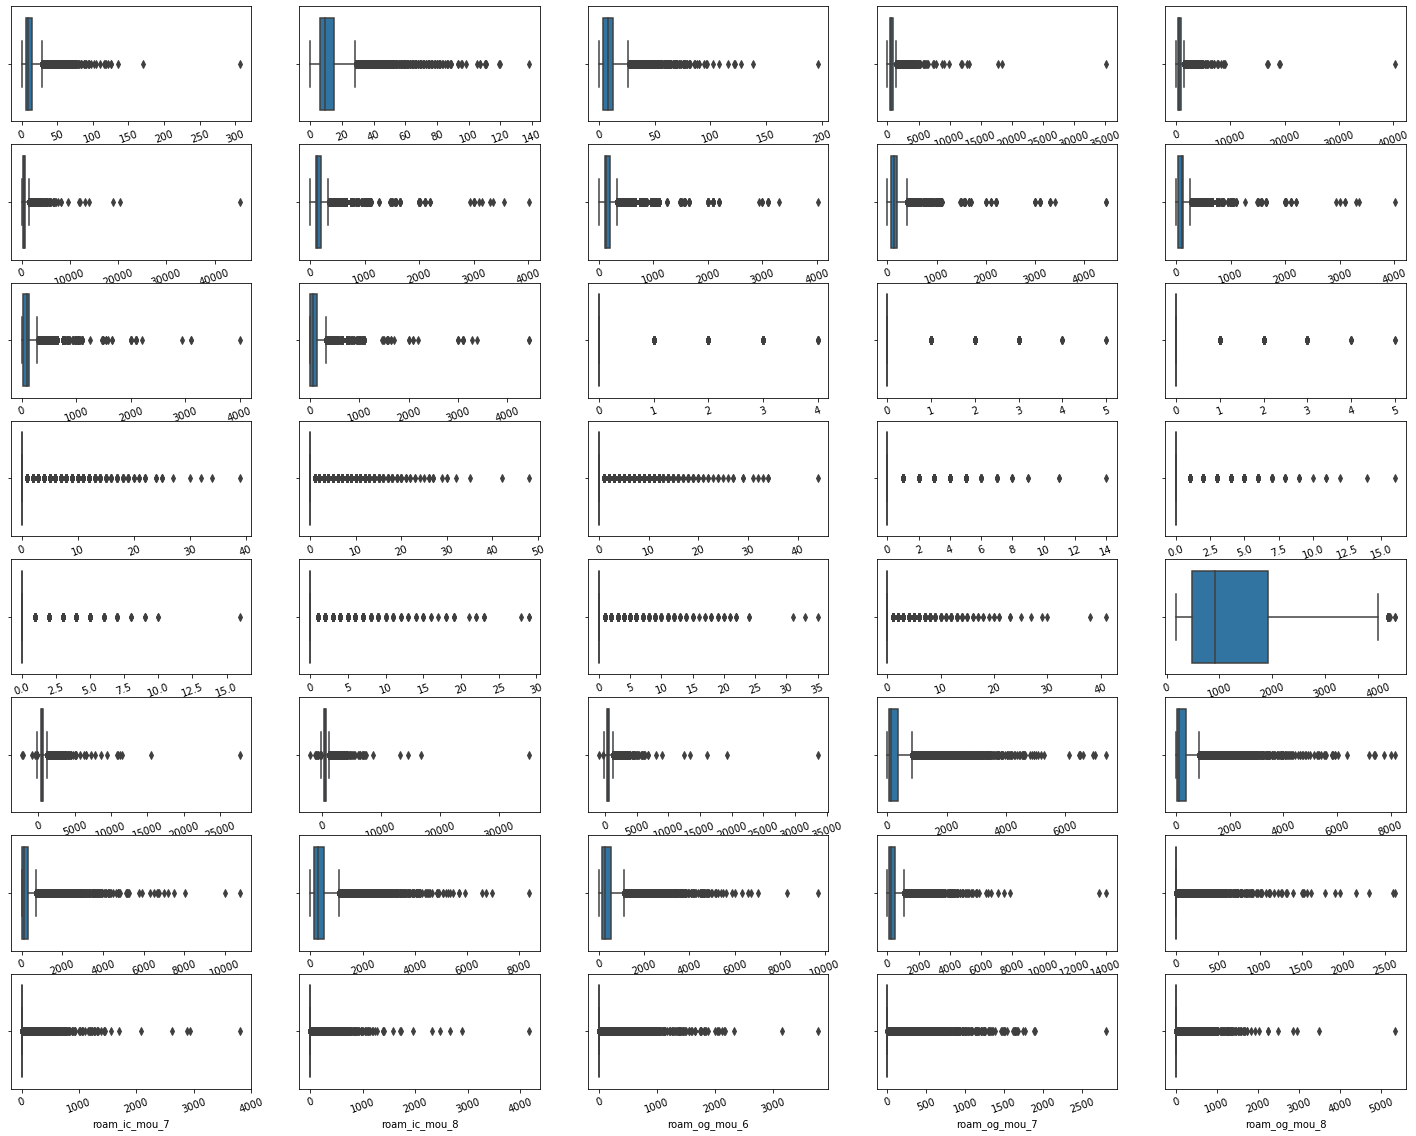

In [244]:
plt.figure(figsize=(25,25))
features = ['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'last_day_rch_amt_8',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'aon',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8']
for i in enumerate(features): 
    ax = plt.subplot(10, 5, i[0]+1)
    sns.boxplot(x=i[1], data=hcv)
    plt.xticks(rotation = 20)

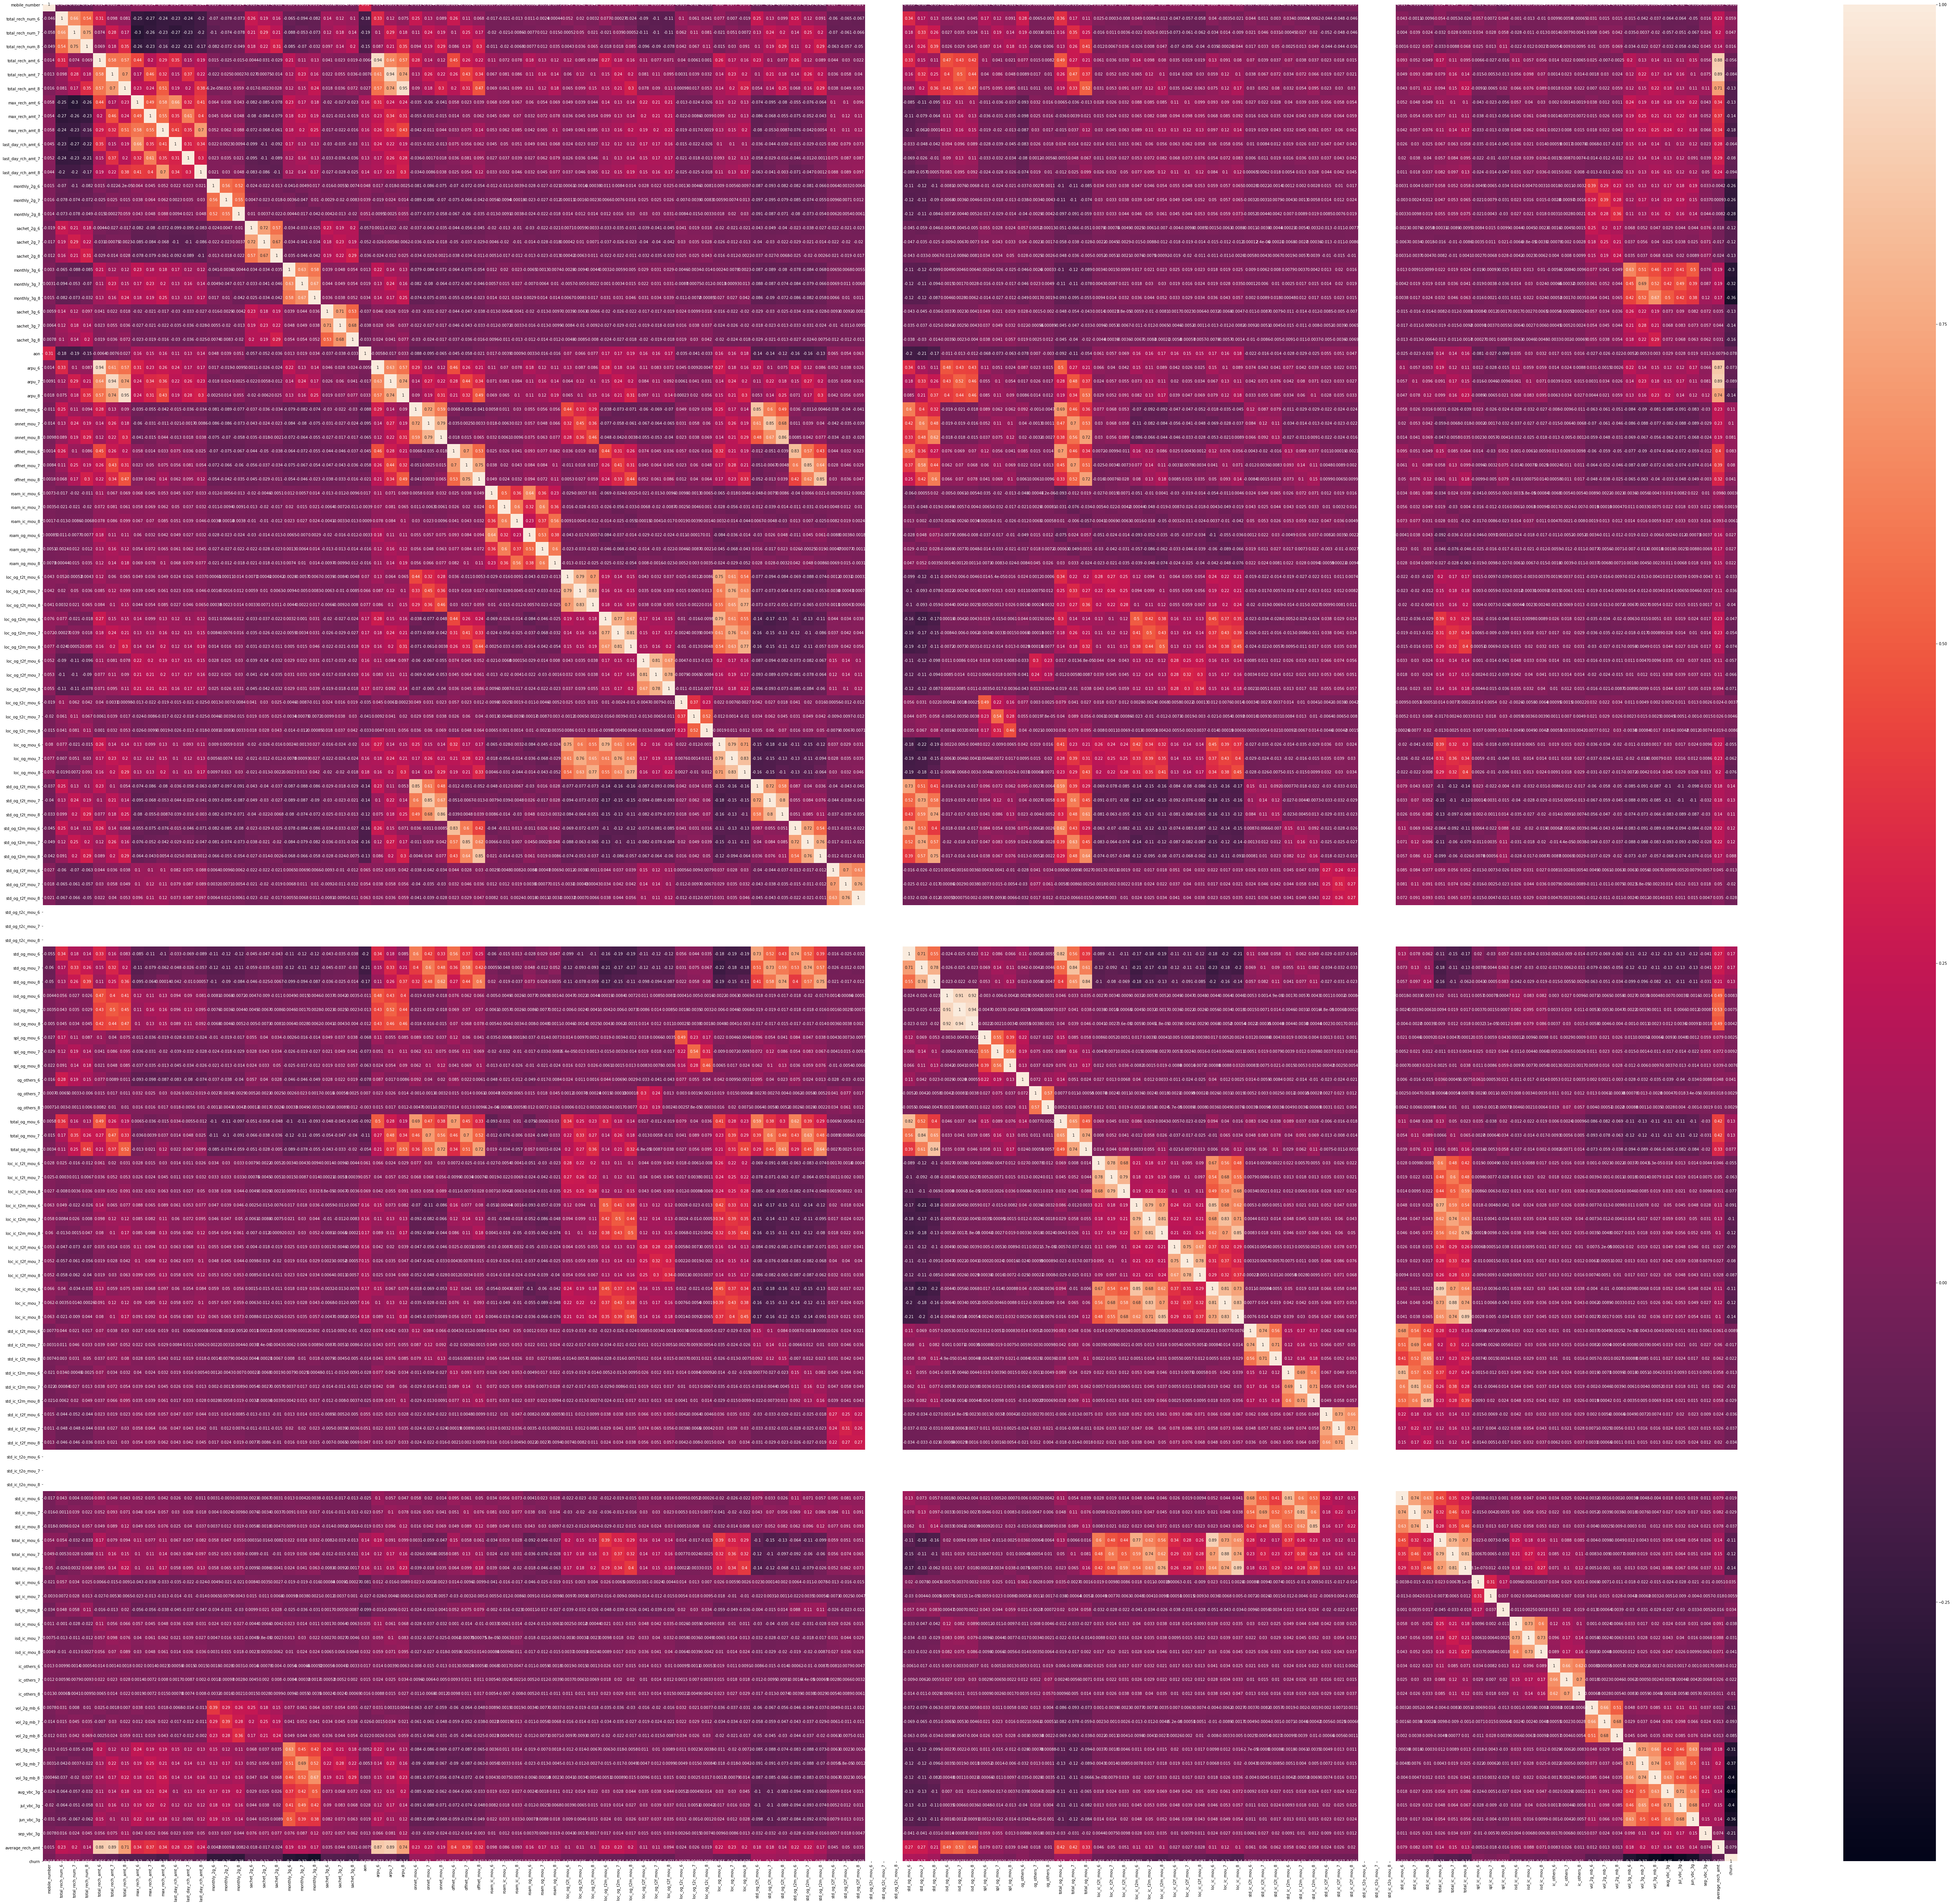

In [245]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,90))        # Size of the figure
sns.heatmap(hcv.corr(),annot = True)
plt.show()

In [246]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
hcv.describe(percentiles=[.25, .5, .75, .90, .95, .99])

mobile_number  total_rech_num_6  total_rech_num_7  total_rech_num_8  \
count   3.007800e+04      30078.000000      30078.000000      30078.000000   
mean    7.001223e+09         12.114935         11.909236         10.222222   
std     6.847079e+05          9.539097          9.602417          9.477290   
min     7.000000e+09          0.000000          0.000000          0.000000   
25%     7.000641e+09          6.000000          6.000000          4.000000   
50%     7.001232e+09          9.000000          9.000000          8.000000   
75%     7.001814e+09         15.000000         15.000000         13.000000   
90%     7.002167e+09         23.000000         23.000000         21.000000   
95%     7.002287e+09         30.000000         30.000000         28.000000   
99%     7.002387e+09         48.000000         48.000000         46.000000   
max     7.002411e+09        307.000000        138.000000        196.000000   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
count      30078.000000      30078.000000      30078.000000    30078.000000   
mean         696.704701        695.159785        613.014994      171.285824   
std          538.964799        561.829673        601.401241      174.556910   
min            0.000000          0.000000          0.000000        0.000000   
25%          431.250000        426.000000        308.000000      110.000000   
50%          584.000000        580.000000        520.000000      120.000000   
75%          837.000000        834.000000        789.000000      200.000000   
90%         1180.000000       1192.000000       1154.000000      297.000000   
95%         1479.000000       1508.150000       1491.150000      500.000000   
99%         2376.000000       2426.230000       2341.230000     1000.000000   
max        35190.000000      40335.000000      45320.000000     4010.000000   

       max_rech_amt_7  max_rech_amt_8  ...   vol_2g_mb_8   vol_3g_mb_6  \
count    30078.000000    30078.000000  ...  30078.000000  30078.000000   
mean       175.487399      162.725913  ...     69.154107    258.184788   
std        181.402790      172.491254  ...    268.260505    865.710004   
min          0.000000        0.000000  ...      0.000000      0.000000   
25%        110.000000       67.000000  ...      0.000000      0.000000   
50%        128.000000      130.000000  ...      0.000000      0.000000   
75%        200.000000      198.000000  ...      9.620000      0.000000   
90%        300.000000      252.000000  ...    153.475000    875.470000   
95%        500.000000      455.000000  ...    409.831500   1504.492500   
99%       1000.000000      951.000000  ...   1255.473300   3570.171500   
max       4010.000000     4449.000000  ...  11117.610000  45735.400000   

        vol_3g_mb_7   vol_3g_mb_8    aug_vbc_3g    jul_vbc_3g    jun_vbc_3g  \
count  30078.000000  30078.000000  30078.000000  30078.000000  30078.000000   
mean     277.643933    269.457771    129.250937    134.929888    121.244634   
std      854.850902    858.470798    390.143049    407.636648    389.394637   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.837500      0.000000      1.485000      1.890000      0.000000   
90%      959.214000    913.900000    438.489000    453.726000    394.279000   
95%     1611.598000   1540.741000    817.125000    844.900500    760.657000   
99%     3758.503100   3781.909500   1819.267500   1940.445600   1864.349200   
max    28144.120000  30036.060000  12916.220000   9165.600000  11166.210000   

         sep_vbc_3g  average_rech_amt         churn  
count  30078.000000      30078.000000  30078.000000  
mean       6.557713        695.761287      0.790910  
std       48.594014        488.478157      0.406665  
min        0.000000        368.000000      0.000000  
25%        0.

In [247]:
# storing categorical column names in the objcols
objcols=["monthly_2g_6","monthly_2g_7","monthly_2g_8","monthly_3g_6","monthly_3g_7","monthly_3g_8"]

In [248]:
# creating dummy varibales for categorical columns
encodeddf_list=[]
for col in objcols:
    encodeddf_list.append(pd.get_dummies(hcv[col],drop_first=True,prefix=col))
hcv1=pd.concat(encodeddf_list,axis=1)
hcv1.shape

(30078, 50)

In [249]:
# concat dummy varibales with the dataset
hcv=pd.concat([hcv,hcv1],axis=1)
hcv.shape

(30078, 184)

### Model Building

In [250]:
from sklearn.model_selection import train_test_split

In [253]:
# Putting feature variable to X
X = hcv.drop(['churn','mobile_number'], axis=1)

X.head()

total_rech_num_6  total_rech_num_7  total_rech_num_8  total_rech_amt_6  \
7                  5                 5                 7              1580   
8                 19                21                14               437   
13                 6                 4                11               507   
16                10                 6                 2               570   
17                19                 2                 4               816   

    total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  max_rech_amt_7  \
7                790              3638            1580             790   
8                601               120              90             154   
13               253               717             110             110   
16               348               160             110             110   
17                 0                30             110               0   

    max_rech_amt_8  last_day_rch_amt_6  ...  monthly_3g_8_2  monthly_3g_8_3  \
7             1580                   0  ...               0               0   
8               30                  50  ...               0               0   
13             130                 110  ...               0               0   
16             130                 100  ...               0               0   
17              30                  30  ...               0               0   

    monthly_3g_8_4  monthly_3g_8_5  monthly_3g_8_6  monthly_3g_8_7  \
7                0               0               0               0   
8                0               0               0               0   
13               0               0               0               0   
16               0               0               0               0   
17               0               0               0               0   

    monthly_3g_8_8  monthly_3g_8_9  monthly_3g_8_10  monthly_3g_8_16  
7                0               0                0                0  
8                0               0                0                0  
13               0               0                0                0  
16               0               0                0                0  
17               0               0                0                0  

[5 rows x 182 columns]

In [254]:
# Putting response variable to y
y = hcv['churn']

y.head()

7     1
8     1
13    1
16    1
17    1
Name: churn, dtype: int64

In [255]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [256]:
X_train.shape, X_test.shape

((21054, 182), (9024, 182))

### Decision Tree

In [257]:
from sklearn.tree import DecisionTreeClassifier


In [258]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [259]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['No churn', "churn"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [260]:
dt = DecisionTreeClassifier(random_state=42,class_weight="balanced", max_depth=3)

In [261]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [262]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [263]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [264]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8904721193122447


array([[ 3942,   450],
       [ 1856, 14806]], dtype=int64)

In [265]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.8803191489361702


array([[1690,  207],
       [ 873, 6254]], dtype=int64)

In [266]:
from sklearn.metrics import classification_report

In [267]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76      1897
           1       0.97      0.88      0.92      7127

    accuracy                           0.88      9024
   macro avg       0.81      0.88      0.84      9024
weighted avg       0.90      0.88      0.89      9024



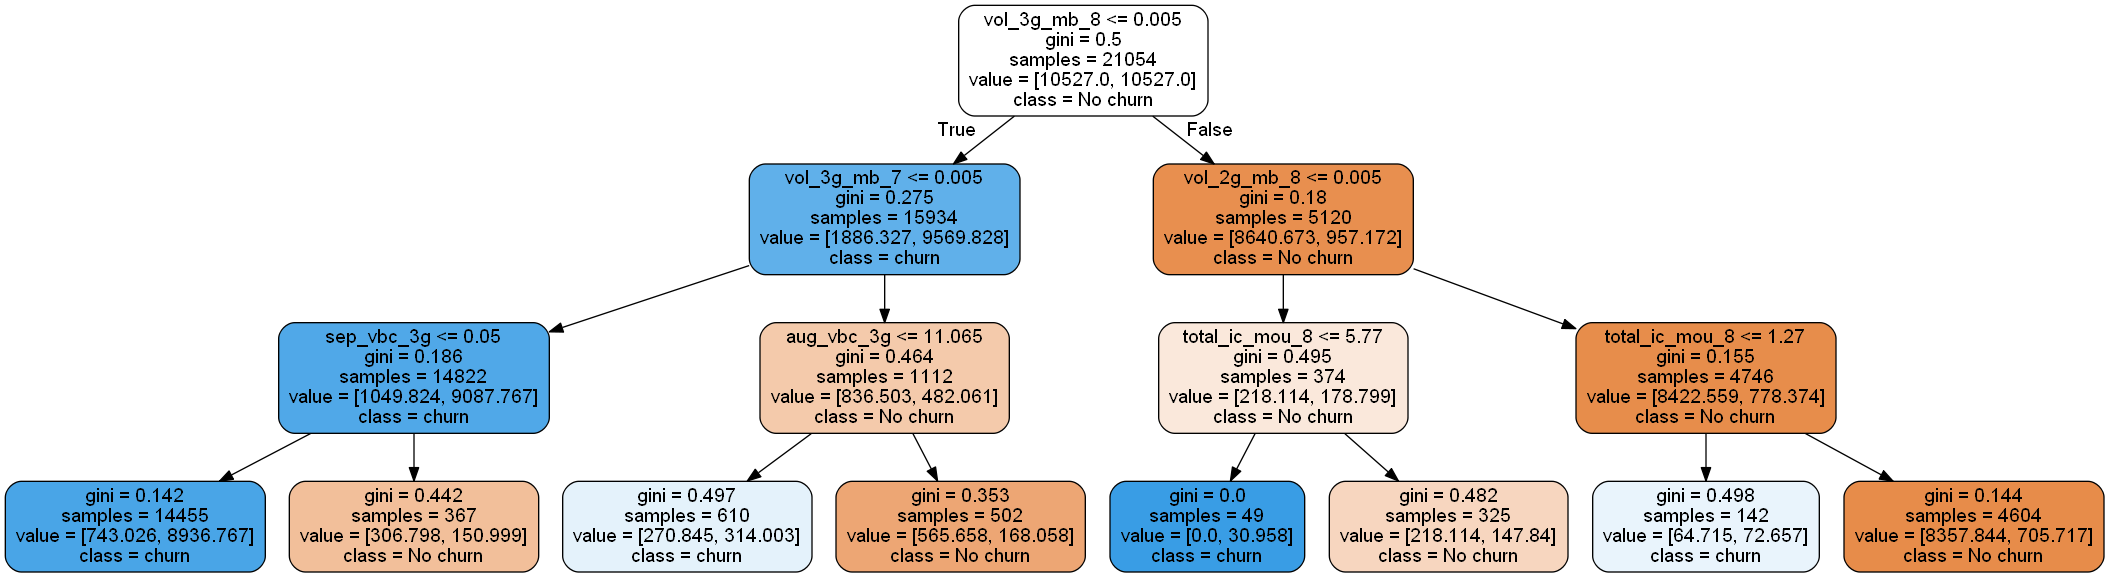

In [268]:
gph = get_dt_graph(dt) 
Image(gph.create_png())

#### Hyper-parameter tuning for the Decision Tree

In [269]:
from sklearn.model_selection import GridSearchCV

In [270]:
dt_1 = DecisionTreeClassifier(random_state=42,class_weight="balanced")

In [271]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [1, 2, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'max_features': [2,3,4],
    
}

In [272]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt_1, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [273]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   13.8s finished


Wall time: 14.2 s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         

In [274]:
grid_search.best_score_

0.8519521231119978

In [275]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

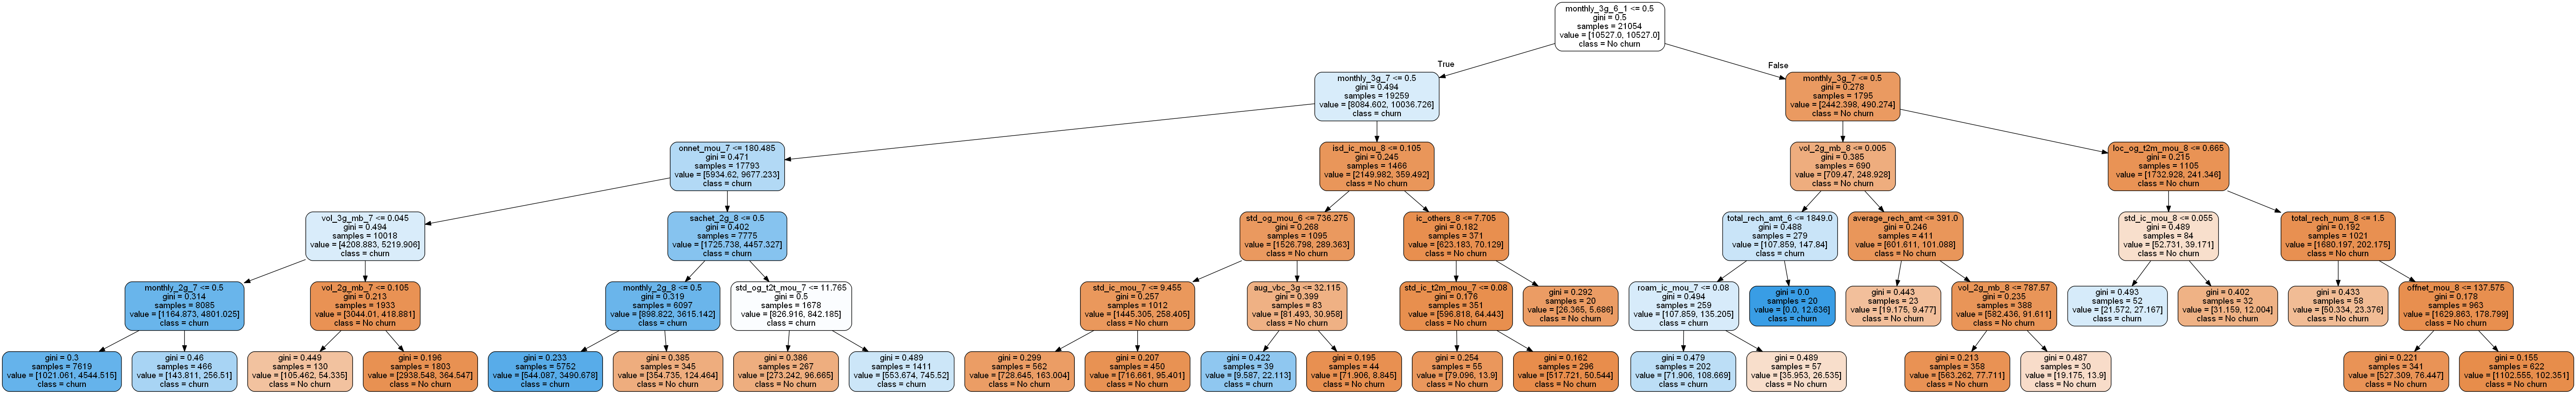

In [276]:
gph = get_dt_graph(dt_best) 
Image(gph.create_png())

#### Evaluating model performance

In [277]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [278]:
evaluate_model(dt_best)

Train Accuracy : 0.853946993445426
Train Confusion Matrix:
[[ 3405   987]
 [ 2088 14574]]
--------------------------------------------------
Test Accuracy : 0.8457446808510638
Test Confusion Matrix:
[[1436  461]
 [ 931 6196]]


In [279]:
from sklearn.metrics import classification_report

In [280]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.76      0.67      1897
           1       0.93      0.87      0.90      7127

    accuracy                           0.85      9024
   macro avg       0.77      0.81      0.79      9024
weighted avg       0.86      0.85      0.85      9024



In [281]:
dt_best.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 1.41039009e-03, 9.88529485e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.82284909e-03, 6.56154160e-02, 0.00000000e+00,
       0.00000000e+00, 4.47133789e-02, 0.00000000e+00, 2.10352849e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.36726814e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.91955375e-04, 0.00000000e+00, 6.08881802e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.72261850e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [282]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})

In [283]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
125      vol_3g_mb_7  0.428168
19      monthly_3g_7  0.210353
146   monthly_3g_6_1  0.157745
14      monthly_2g_8  0.065615
17       sachet_2g_8  0.044713
..               ...       ...
70      isd_og_mou_6  0.000000
71      isd_og_mou_7  0.000000
72      isd_og_mou_8  0.000000
73      spl_og_mou_6  0.000000
181  monthly_3g_8_16  0.000000

[182 rows x 2 columns]

### Perform PCA

In [284]:
X_train.shape

(21054, 182)

In [285]:
from sklearn.decomposition import PCA

In [286]:
pca = PCA(random_state=42)

In [287]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [288]:
pca.components_

array([[ 1.43910727e-03,  1.79418043e-03,  1.81244924e-03, ...,
        -7.82733675e-08, -4.05810859e-08,  8.38517376e-09],
       [ 1.10376867e-04,  3.10155054e-04,  4.87238715e-04, ...,
         6.42250354e-07,  3.25481572e-07,  3.19851006e-07],
       [ 6.27257087e-04,  6.81565065e-04,  2.47393928e-04, ...,
         2.07392894e-07,  9.42622452e-08,  9.38662810e-08],
       ...,
       [ 0.00000000e+00,  1.49642537e-16, -1.48486028e-16, ...,
         9.21200545e-02,  1.02355616e-01,  6.64592381e-01],
       [-0.00000000e+00, -1.16404465e-16,  5.25699314e-17, ...,
        -3.41649848e-01, -3.79610942e-01, -2.00025744e-01],
       [ 0.00000000e+00, -8.71516163e-16, -3.47337241e-16, ...,
         1.30635596e-02,  1.45150663e-02,  6.95401095e-03]])

In [289]:
pca.explained_variance_ratio_

array([2.48444407e-01, 1.78421121e-01, 1.06724835e-01, 7.07253949e-02,
       6.21129699e-02, 5.66924102e-02, 3.93125319e-02, 3.23690513e-02,
       2.58843264e-02, 2.36916527e-02, 1.69057904e-02, 1.51822584e-02,
       1.26603316e-02, 1.16997277e-02, 1.15307124e-02, 9.12003491e-03,
       7.72013477e-03, 6.69925165e-03, 6.38967619e-03, 5.22804052e-03,
       4.74628026e-03, 4.39538772e-03, 4.15951748e-03, 3.77139496e-03,
       3.37052544e-03, 2.76280660e-03, 2.63991572e-03, 2.58517030e-03,
       2.29081901e-03, 2.14164203e-03, 1.75775492e-03, 1.60980186e-03,
       1.51808450e-03, 1.44126620e-03, 1.26715566e-03, 1.10438922e-03,
       8.95833504e-04, 8.72789336e-04, 8.41621026e-04, 7.92712451e-04,
       7.06145800e-04, 6.84304947e-04, 6.39886855e-04, 5.60486125e-04,
       5.50379418e-04, 5.00260479e-04, 4.36967475e-04, 4.27274410e-04,
       4.13619168e-04, 4.00910042e-04, 2.44982255e-04, 2.01467336e-04,
       1.92129020e-04, 1.82564718e-04, 1.69636494e-04, 1.55256874e-04,
      

In [290]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

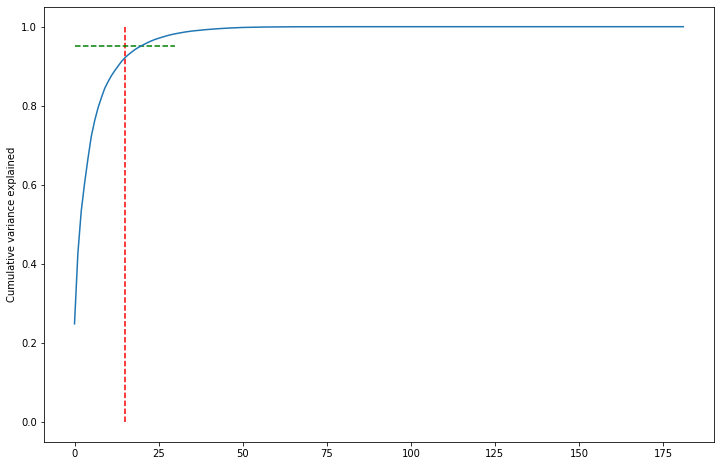

In [291]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [292]:
from sklearn.decomposition import IncrementalPCA

In [293]:
pca_final = IncrementalPCA(n_components=16)

In [294]:
df_train_pca = pca_final.fit_transform(X_train)

In [295]:
df_train_pca.shape

(21054, 16)

In [296]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [297]:
corrmat.shape

(16, 16)

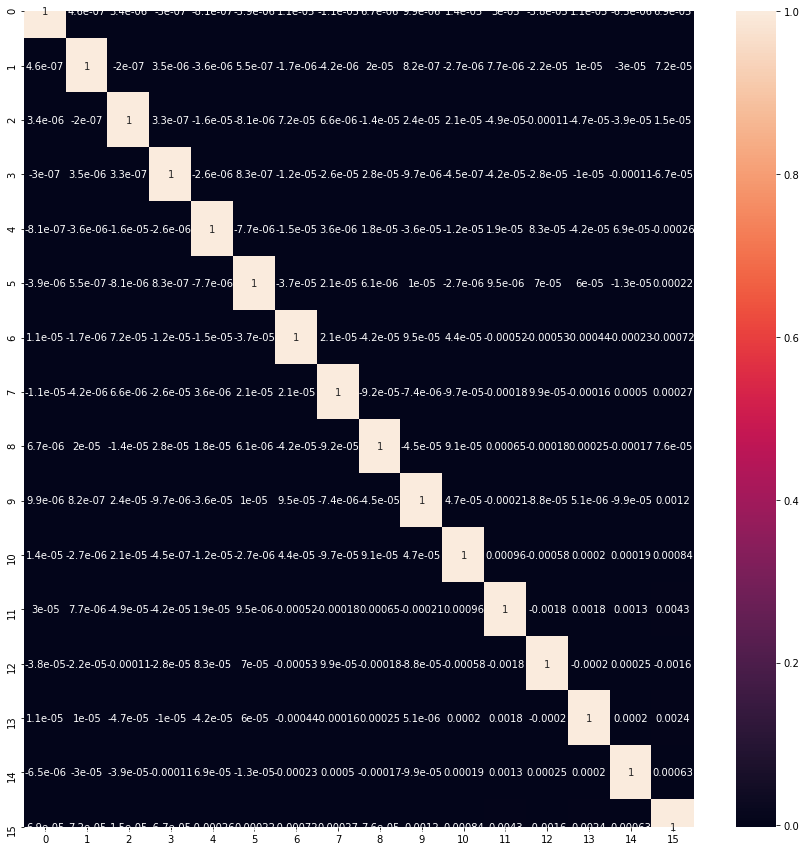

In [298]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [299]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9024, 16)

In [300]:
y_test.shape

(9024,)

### Adaboost

In [301]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn import metrics
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')


In [302]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, class_weight="balanced",random_state = 100)

In [303]:
# fit the shallow decision tree 
shallow_tree.fit(df_train_pca, y_train)

# test error
y_pred = shallow_tree.predict(df_test_pca)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7939937943262412

In [304]:
# adaboost with the tree as base estimator

estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(df_train_pca, y_train)
    y_pred = ABC.predict(df_test_pca)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)
    

In [305]:
abc_scores

[0.7939937943262412,
 0.8229166666666666,
 0.8377659574468085,
 0.853834219858156,
 0.849290780141844,
 0.8559397163120568,
 0.859375,
 0.8562721631205674,
 0.858488475177305,
 0.8569370567375887,
 0.8587101063829787,
 0.8558289007092199,
 0.8563829787234043,
 0.8580452127659575,
 0.8582668439716312,
 0.8573803191489362,
 0.8573803191489362]

In [306]:
estimators

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46, 49]

In [307]:
abc_scores

[0.7939937943262412,
 0.8229166666666666,
 0.8377659574468085,
 0.853834219858156,
 0.849290780141844,
 0.8559397163120568,
 0.859375,
 0.8562721631205674,
 0.858488475177305,
 0.8569370567375887,
 0.8587101063829787,
 0.8558289007092199,
 0.8563829787234043,
 0.8580452127659575,
 0.8582668439716312,
 0.8573803191489362,
 0.8573803191489362]

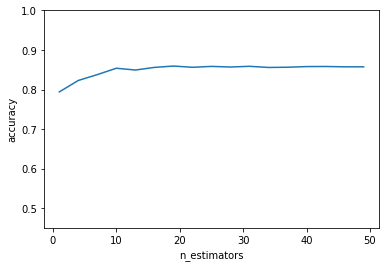

In [308]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.45, 1])
plt.show()

### XGBoost

In [309]:
import numpy as np
import pandas as pd

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
%matplotlib inline

In [310]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

[16:56:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:56:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:56:23] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in la

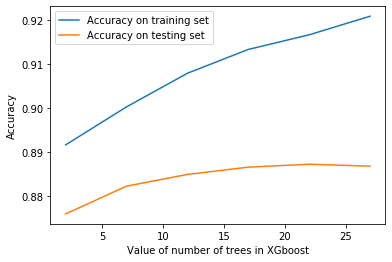

In [311]:

tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,class_weight="balanced")
    xgb.fit(df_train_pca,y_train)
    score1.append(xgb.score(df_train_pca,y_train))
    score2.append(xgb.score(df_test_pca,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [312]:
xgb=XGBClassifier(n_estimators=25)
xgb.fit(X_train,y_train)
print('Accuracy of XGB n=6 on the testing dataset is :{:.3f}'.format(xgb.score(X_test,y_test)))

Accuracy of XGB n=6 on the testing dataset is :0.908


## Random forest performance

In [313]:
rf = RandomForestClassifier(random_state=42,class_weight="balanced" ,n_jobs=-1)

In [314]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [315]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [316]:
%%time
grid_search.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  2.8min finished


Wall time: 2min 47s


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             i

In [317]:
grid_search.best_score_

0.8804027738197017

In [318]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=50, n_jobs=-1, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [319]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [320]:
evaluate_model(rf_best)

Train Accuracy : 0.9384440011399259
Train Confusion Matrix:
[[ 4092   300]
 [  996 15666]]
--------------------------------------------------
Test Accuracy : 0.8784352836879432
Test Confusion Matrix:
[[1460  437]
 [ 660 6467]]


### Recommend strategies to manage customer churn based on your observations.

 

Here I build decision tree model for interpretability and xgboost,adaboost and random forest model for good performance.

Xgboost performance is compartively better than adaboost and random forest.
    
1.Decision  predicts that customer who are not recharging 2g,3g and talktime are mostly churning.Here I recommand company to provide best offers to customer who are not recharging properly.

2.Send recharge offer scheme message to the customer frequentl.

3.Call customer and talk to them regarding offers.

4.Provide more 3g data for less money because customer who are not recharging internet are mostly likely to churn 